In [1]:
import copy
import random
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)    
matplotlib.rcParams['axes.unicode_minus'] = False      
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 150)

from xgboost import XGBRegressor

import torch 
import torch.nn as nn 
import torch.optim as optim 
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
torch.set_printoptions(sci_mode=False)
random_seed = 616

In [2]:
def plot_hongsunum(predict_df, names = None, one=None):
    if names == None :
        pred_names = ['true'] + list(predict_df.filter(regex='pred_').columns)
    else:
        pred_names = ['true'] + [f"pred_{name}" for name in names]
    
    if one == None:
        for idx in predict_df['홍수사상번호'].unique():
            predict_df.loc[predict_df['홍수사상번호'] ==idx][pred_names].plot(figsize=(20,12))
            plt.legend()
            plt.title(f"홍수사상번호 : {idx}")
            plt.show()
    else:
        predict_df[pred_names].plot(figsize=(20,12))
        plt.legend()
        plt.show()

In [3]:
predict_dnn = pd.read_csv('predict/predict_df_DNN.csv', index_col=0)
predict_ml = pd.read_csv('predict/predict_df_ML.csv', index_col=0)

score_df_dnn = pd.read_csv('predict/score_df_DNN.csv', index_col=0)
score_df_dnn.columns = [['DNN']*4, score_df_dnn.columns]
score_df_ml = pd.read_csv('predict/score_df_ML.csv', index_col=0, header=[0, 1])

In [5]:
predict_dnn

,홍수사상번호,연,월,일,시간,true,pred_DNN_base,pred_DNN_base_2123,pred_DNN_t-1 t+1,pred_DNN_waterlevel t-1 t+1,pred_DNN_3 cluster,pred_DNN_4 cluster,pred_DNN_5 cluster,pred_DNN_6 cluster,pred_DNN_log,pred_DNN_origin + log,pred_DNN_x2,pred_DNN_5cluster + x2,pred_DNN_5cluster + t,pred_DNN_t + x2,pred_DNN_5cluster + t + x2
0,1,2006,7,10,8,189.10,53.00,78.26,123.62,19.87,147.76,102.15,96.38,75.15,57.90,106.57,100.91,159.54,6.03,11.90,12.84
1,1,2006,7,10,9,216.95,58.04,94.41,123.62,19.87,177.25,105.15,103.45,83.46,58.66,109.86,110.16,172.67,6.03,11.90,12.84
2,1,2006,7,10,10,251.42,61.05,100.72,140.06,20.58,190.85,107.50,106.66,86.49,61.58,112.09,117.19,179.53,10.63,14.85,29.29
3,1,2006,7,10,11,302.81,84.45,149.57,153.14,26.15,258.41,122.17,123.82,106.23,66.41,131.99,158.69,215.29,18.14,17.40,54.08
4,1,2006,7,10,12,384.78,111.07,188.38,159.23,31.34,301.61,133.80,141.26,123.47,78.75,155.06,192.14,238.46,25.53,18.44,70.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,25,2017,7,18,18,513.37,467.88,411.31,412.23,404.00,463.22,458.42,511.18,485.80,310.79,428.18,452.66,484.51,471.15,403.16,436.35
2887,25,2017,7,18,19,502.85,467.89,435.36,414.42,423.99,457.77,451.44,506.91,484.03,284.25,384.43,447.76,471.34,466.95,419.09,428.29
2888,25,2017,7,18,20,491.95,463.96,438.21,415.62,424.19,452.25,445.47,502.44,480.36,272.66,358.73,442.36,464.07,463.22,416.48,424.76
2889,25,2017,7,18,21,481.10,455.38,430.37,410.54,417.52,443.79,437.42,495.95,473.38,257.17,347.08,434.39,456.49,457.97,408.83,420.03


In [6]:
predict_df = pd.merge(predict_dnn, predict_ml)
score_df = pd.concat([score_df_ml, score_df_dnn], axis=1)

In [7]:
predict_df.to_csv("predict/predict_df_merge.csv")
score_df.to_csv("predict/score_df_merge.csv")

In [23]:
score_df["DNN"].sort_values('RMSE')

,RMSE,RMSLE,R2_score,MAPE
t + x2,413.58,0.41,0.96,23.08
5cluster + t,449.92,0.43,0.96,23.70
x2,454.84,0.41,0.96,24.39
5cluster + x2,455.41,0.52,0.96,25.68
5cluster + t + x2,457.79,0.58,0.96,27.17
t-1 t+1,465.12,0.34,0.95,21.17
4 cluster,468.06,0.54,0.95,24.76
base_2123,490.85,0.47,0.95,26.60
origin + log,494.40,0.41,0.95,29.15
5 cluster,500.41,0.58,0.95,25.04


In [8]:
score_df.loc[:,score_df.columns.get_level_values(1).isin({'RMSE', 'RMSLE'})]

LR            DT       SGDRegressor       KernelRidge  \
                      RMSE RMSLE    RMSE RMSLE         RMSE RMSLE        RMSE   
base                884.28  1.83 1122.25  0.53       933.32  1.93     1445.31   
base_2123           906.78  1.91 1214.99  0.55       917.97  2.00     1467.43   
t-1 t+1             842.22  1.81 1110.15  0.50       891.04  1.93     1430.47   
waterlevel t-1 t+1  885.95  1.79 1104.88  0.52       879.43  1.92     1453.24   
3 cluster           884.93  1.70 1119.07  0.54       890.29  1.97     1429.99   
4 cluster           888.88  1.67 1118.74  0.53       839.14  1.87     1435.70   
5 cluster           889.02  1.70 1098.28  0.54       881.02  1.96     1438.71   
6 cluster           889.02  1.70 1135.65  0.56       915.39  1.85     1438.71   
log                1442.59  1.63 1120.20  0.52      1628.80  1.67     2021.06   
origin + log       1442.59  1.63 1120.20  0.52      1648.95  1.83     2021.06   
x2                  537.08  1.14 1146.99  0.53       534.38  1.25     1314.17   
5cluster + x2       544.02  1.16 1118.74  0.55       545.71  1.13     1321.96   
5cluster + t        512.87  1.18 1113.21  0.52       509.85  1.18     1310.35   
t + x2              503.98  1.14 1116.02  0.53       503.75  1.13     1300.60   
5cluster + t + x2   512.87  1.18 1113.21  0.52       504.69  1.10     1310.35   

                             XGB          DNN        
                   RMSLE    RMSE RMSLE   RMSE RMSLE  
base                4.31  984.90  0.46 509.75  0.45  
base_2123           4.26 1032.48  0.53 490.85  0.47  
t-1 t+1             4.32  973.41  0.46 465.12  0.34  
waterlevel t-1 t+1  4.32 1028.03  0.63 532.76  0.44  
3 cluster           4.28 1001.61  0.49 524.74  0.63  
4 cluster           4.30 1001.97  0.46 468.06  0.54  
5 cluster           4.30 1004.49  0.52 500.41  0.58  
6 cluster           4.30 1004.49  0.52 500.88  0.41  
log                 3.84  985.69  0.46 613.79  0.70  
origin + log        3.84  985.69  0.46 494.40  0.41  
x2                  4.66  984.90  0.46 454.84  0.41  
5cluster + x2       4.67 1004.49  0.52 455.41  0.52  
5cluster + t        4.69  991.91  0.48 449.92  0.43  
t + x2              4.69  973.41  0.46 413.58  0.41  
5cluster + t + x2   4.69  991.91  0.48 457.79  0.58

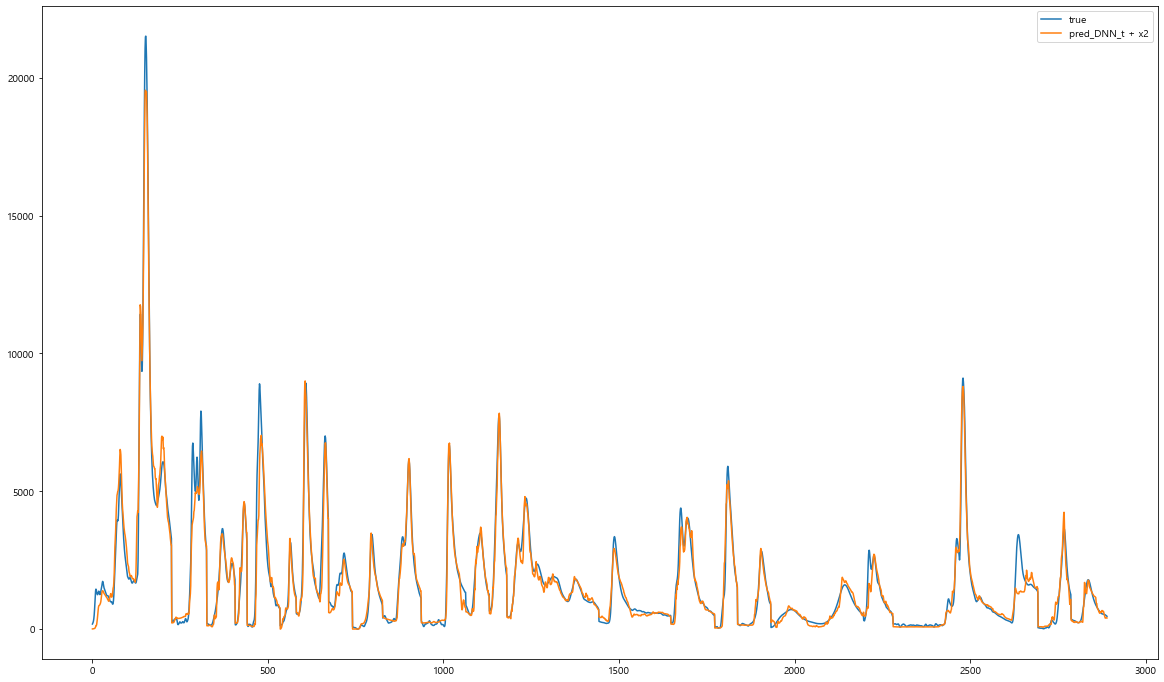

In [10]:
plot_hongsunum(predict_df, names = ['DNN_t + x2'], one=True)

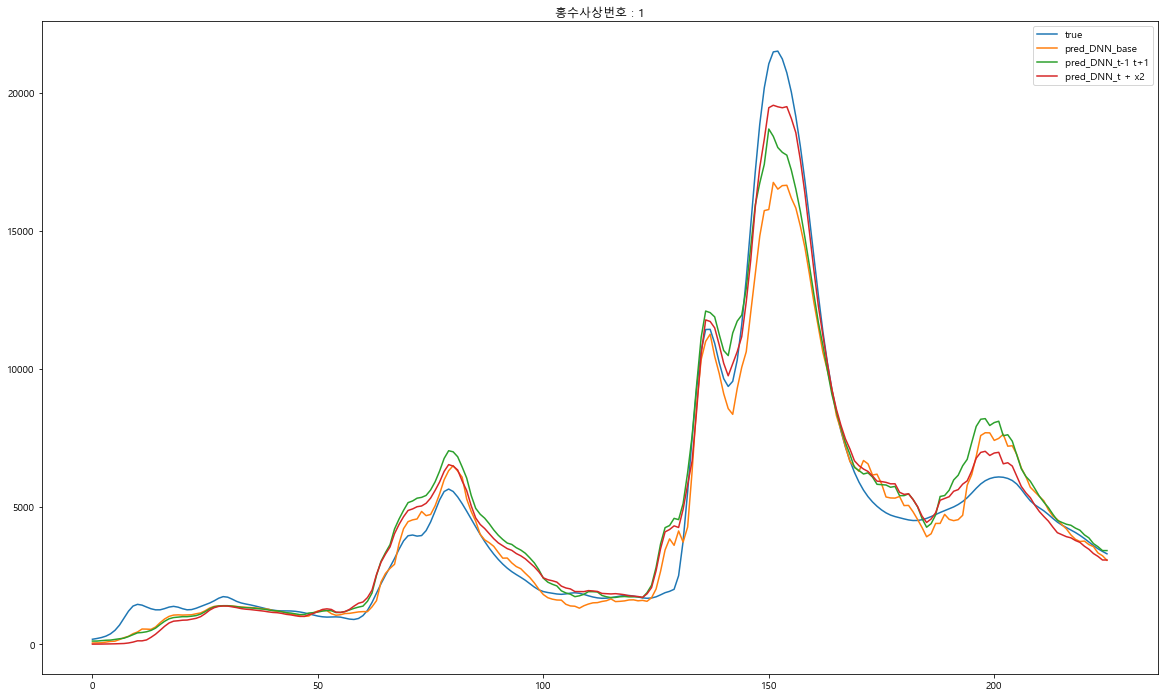

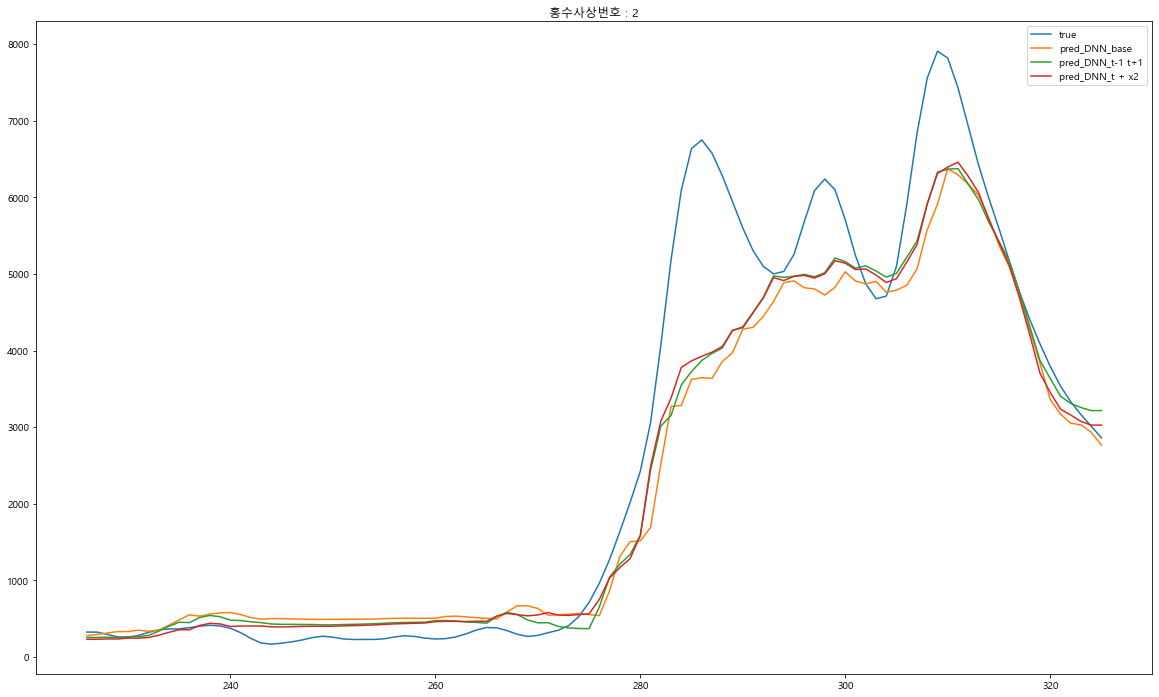

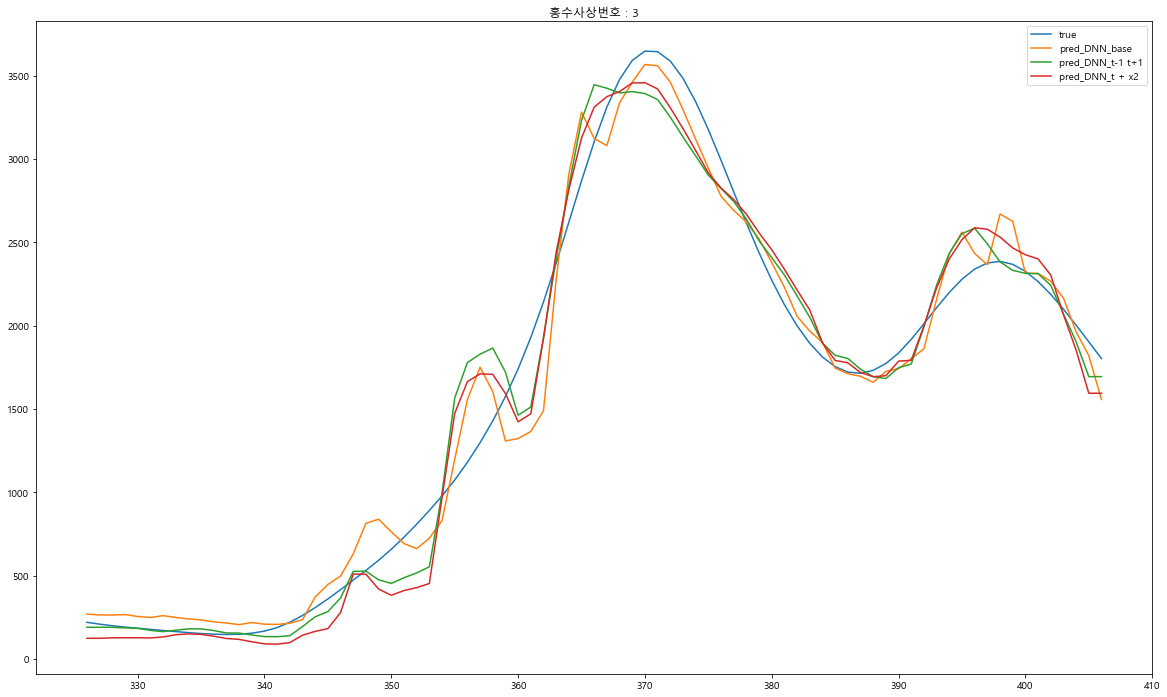

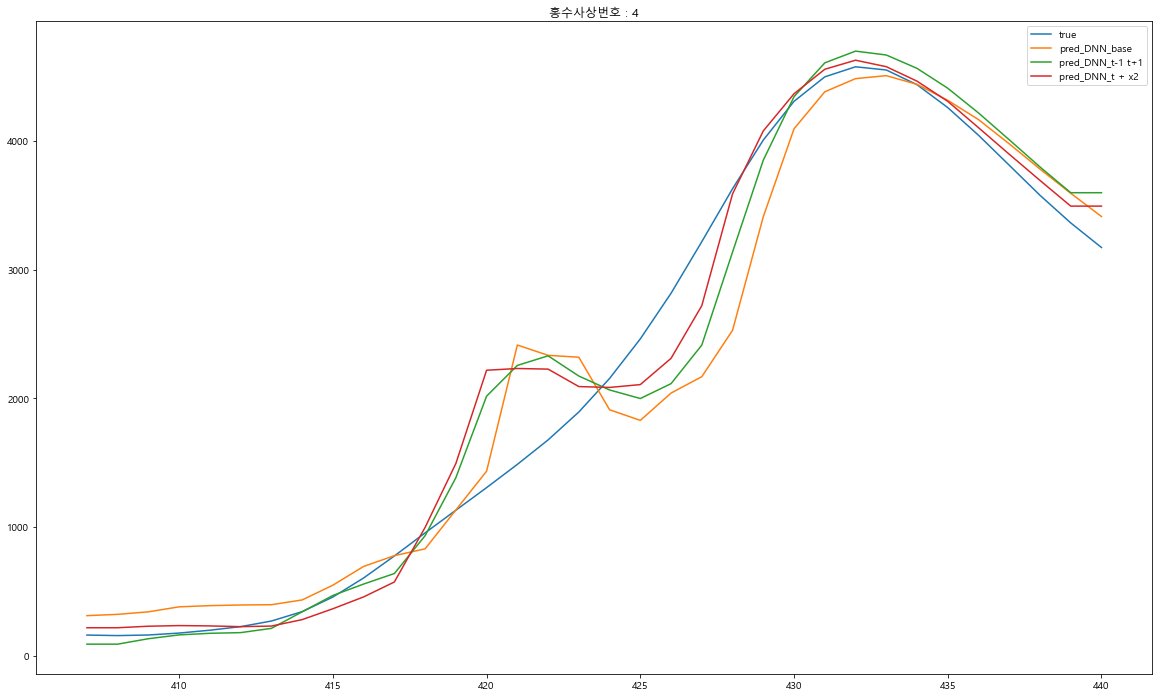

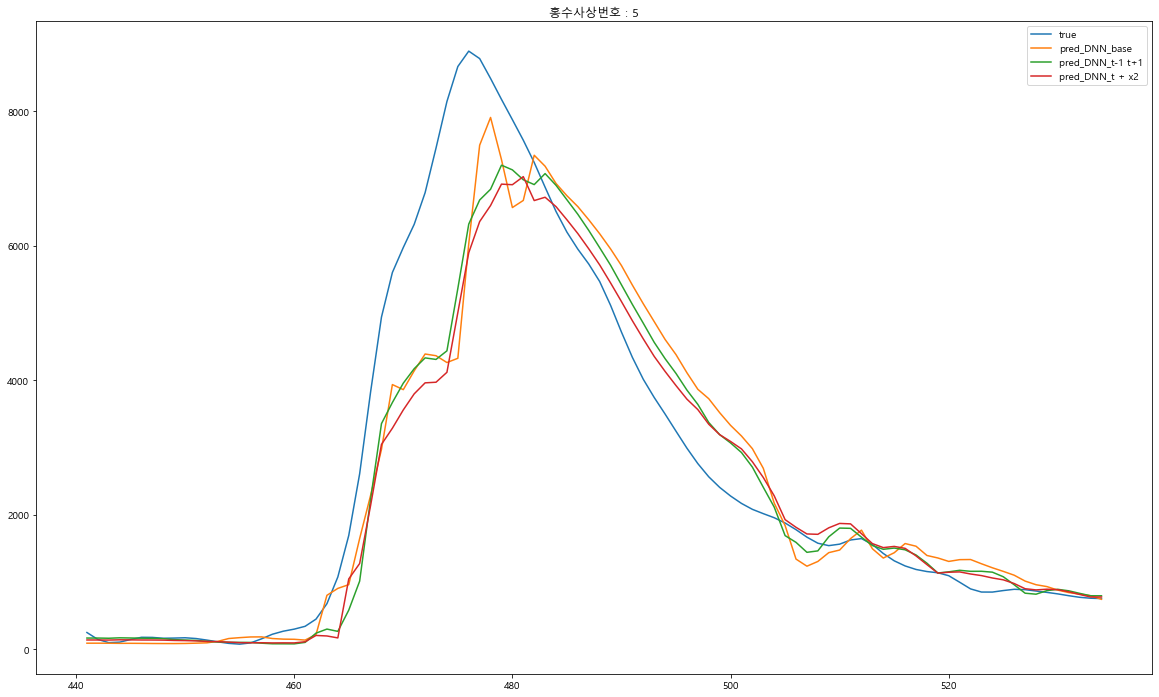

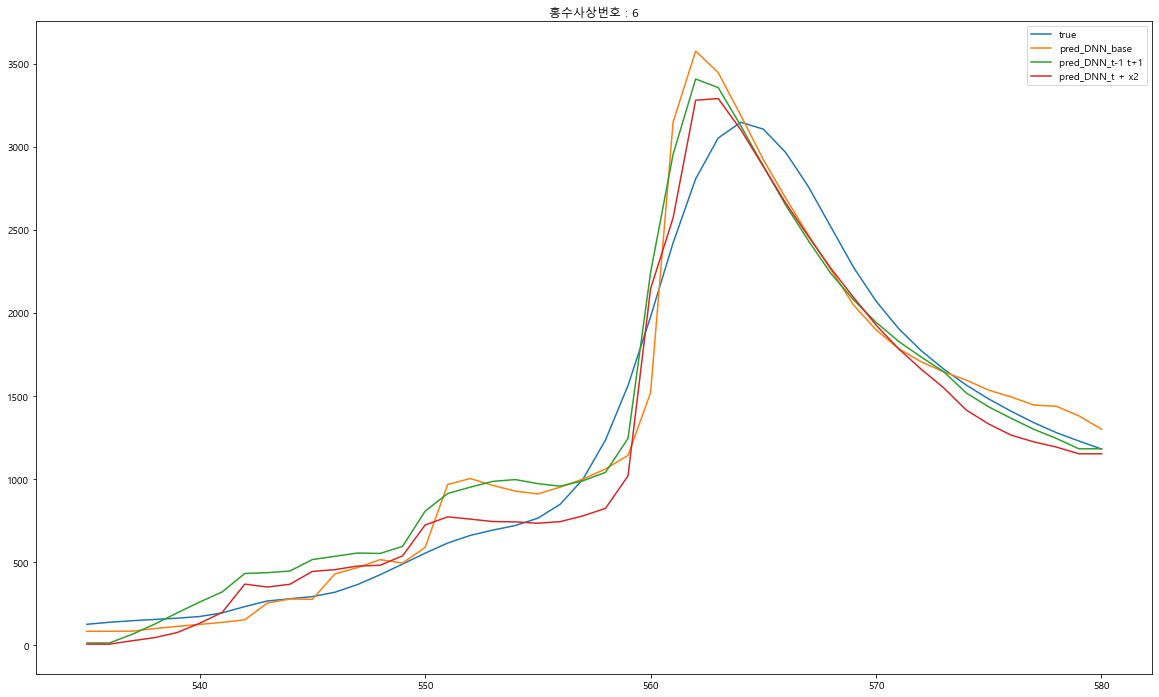

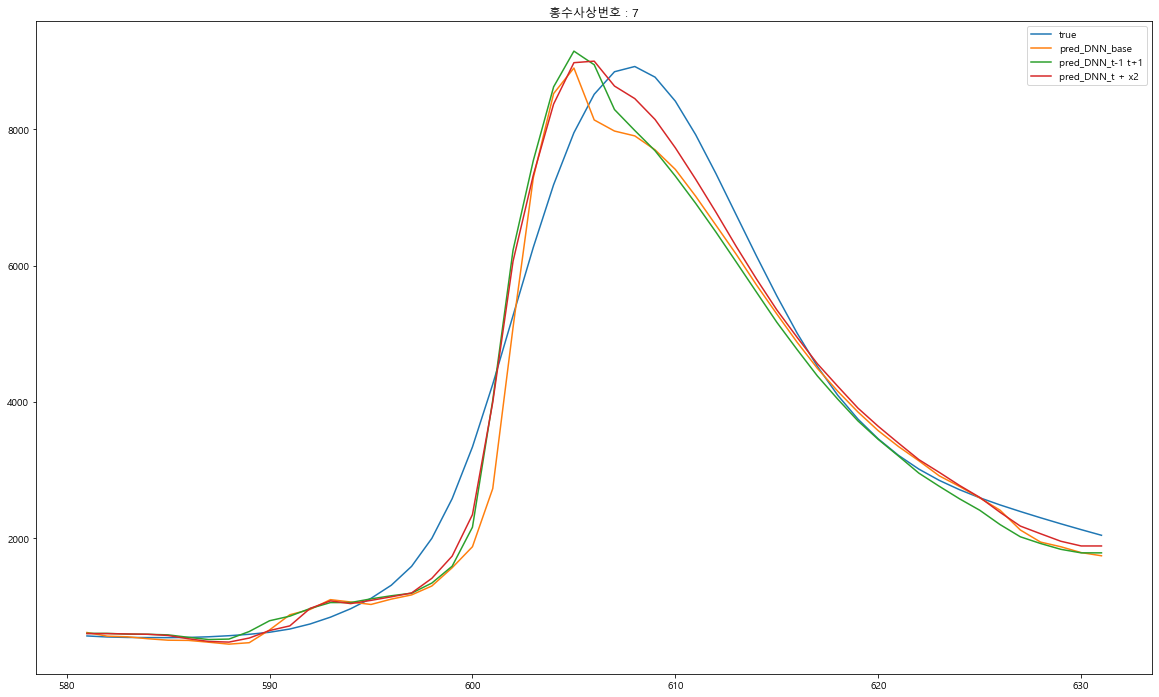

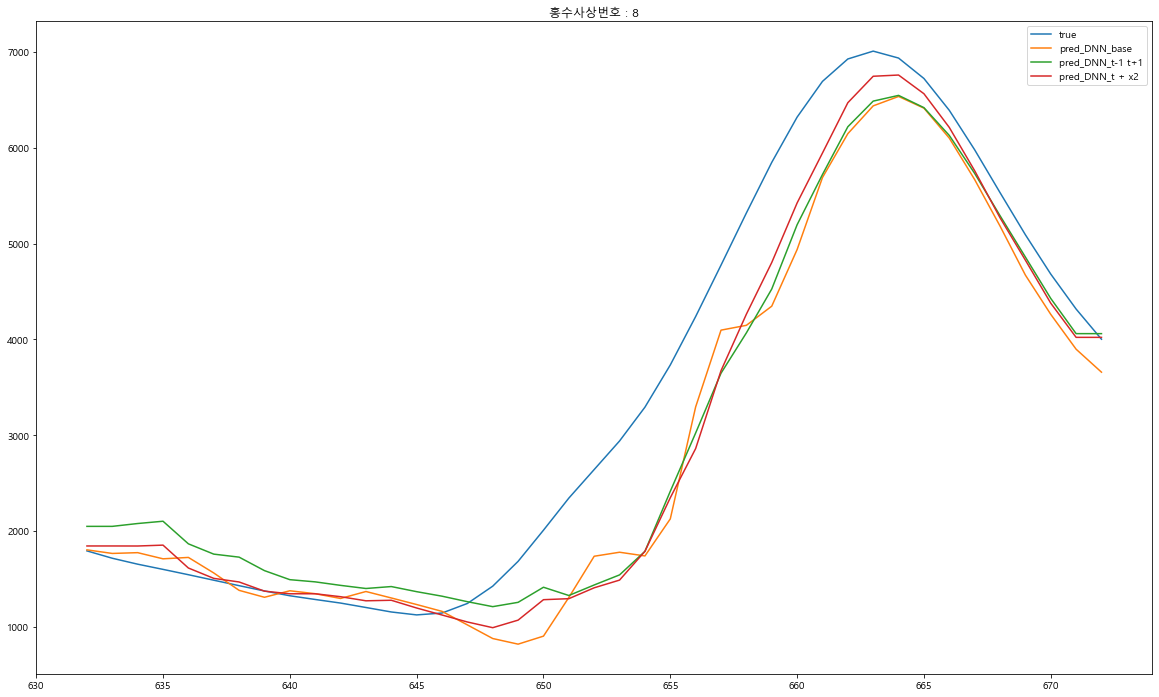

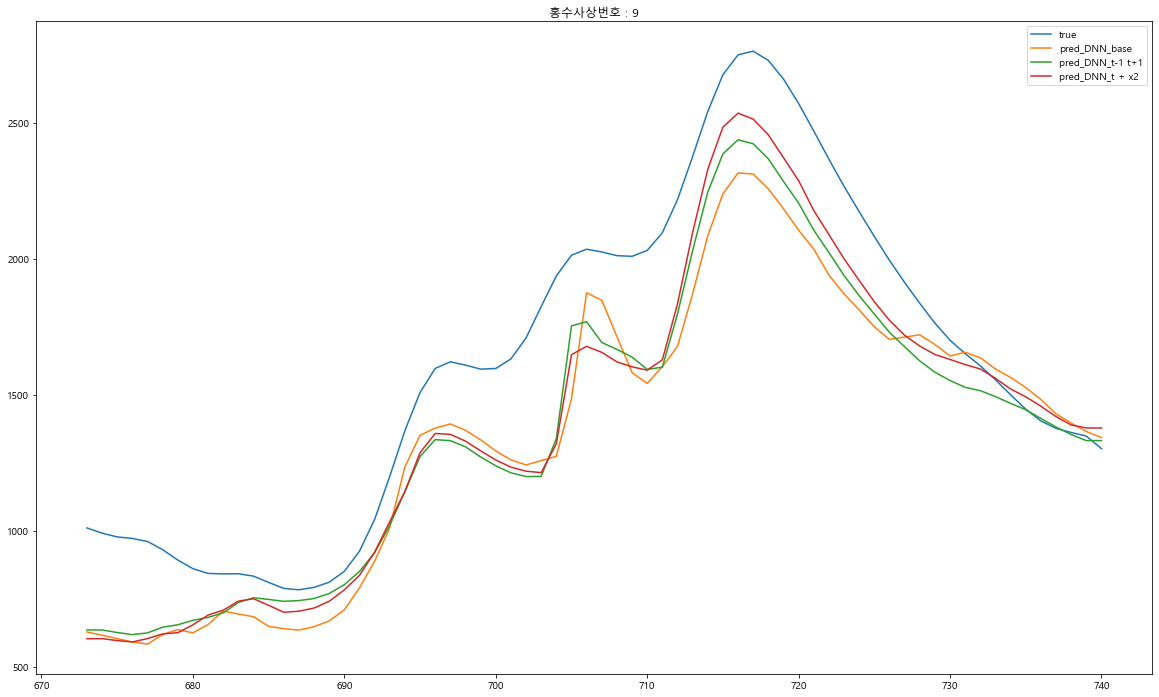

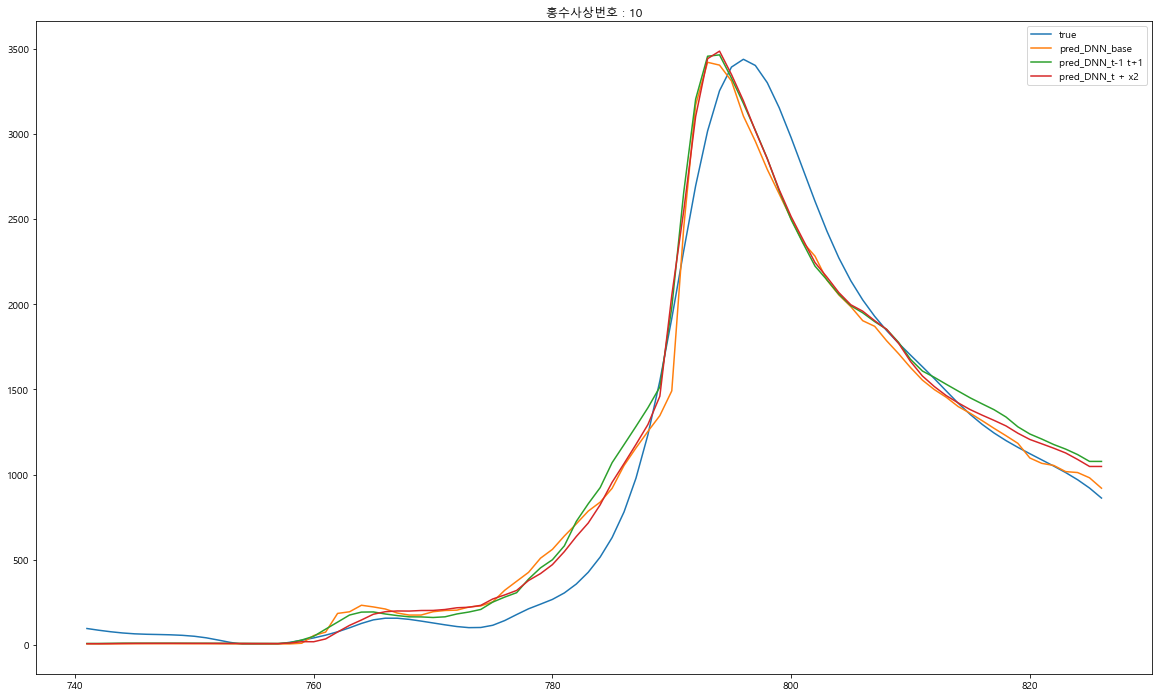

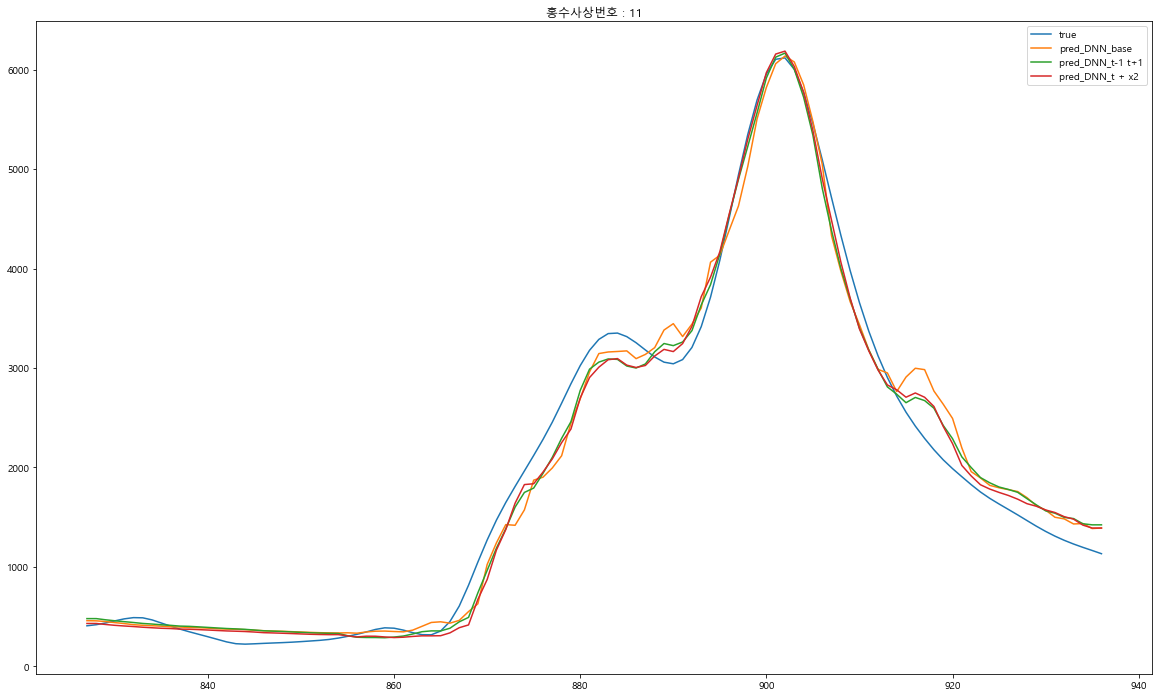

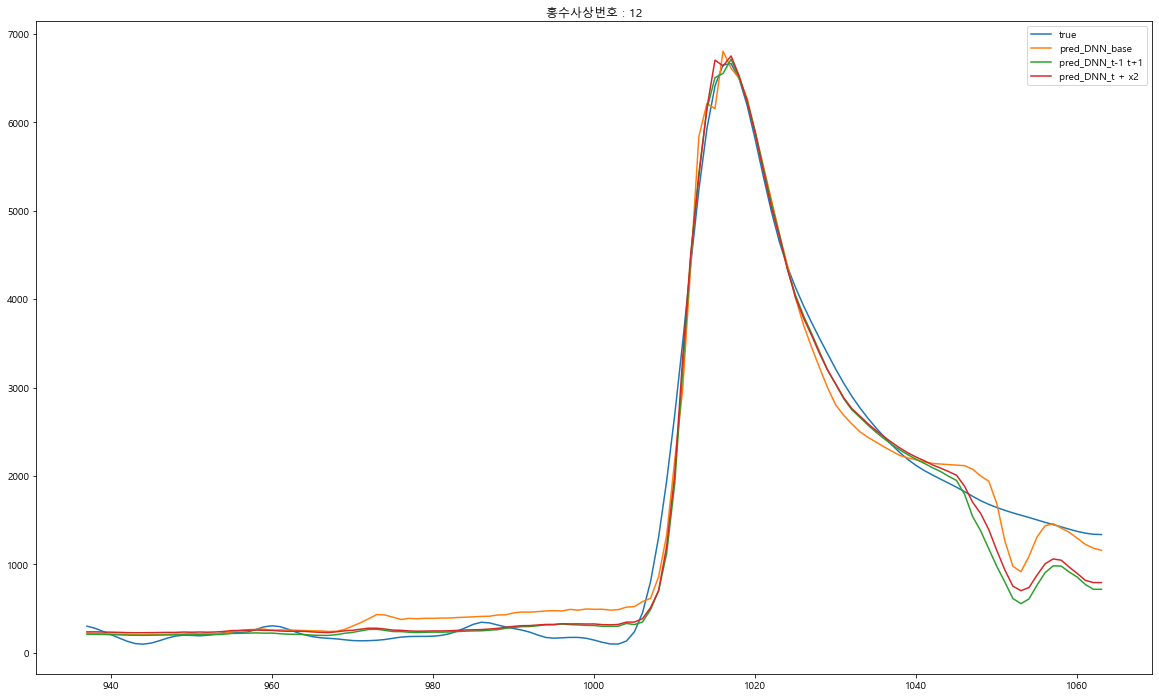

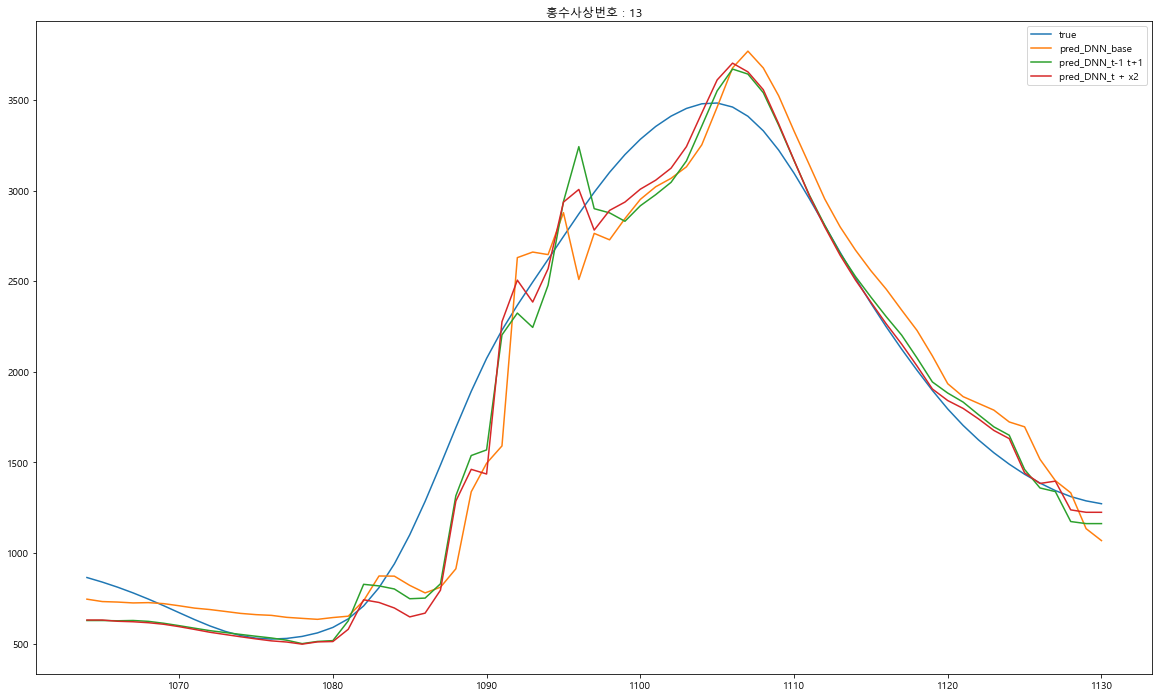

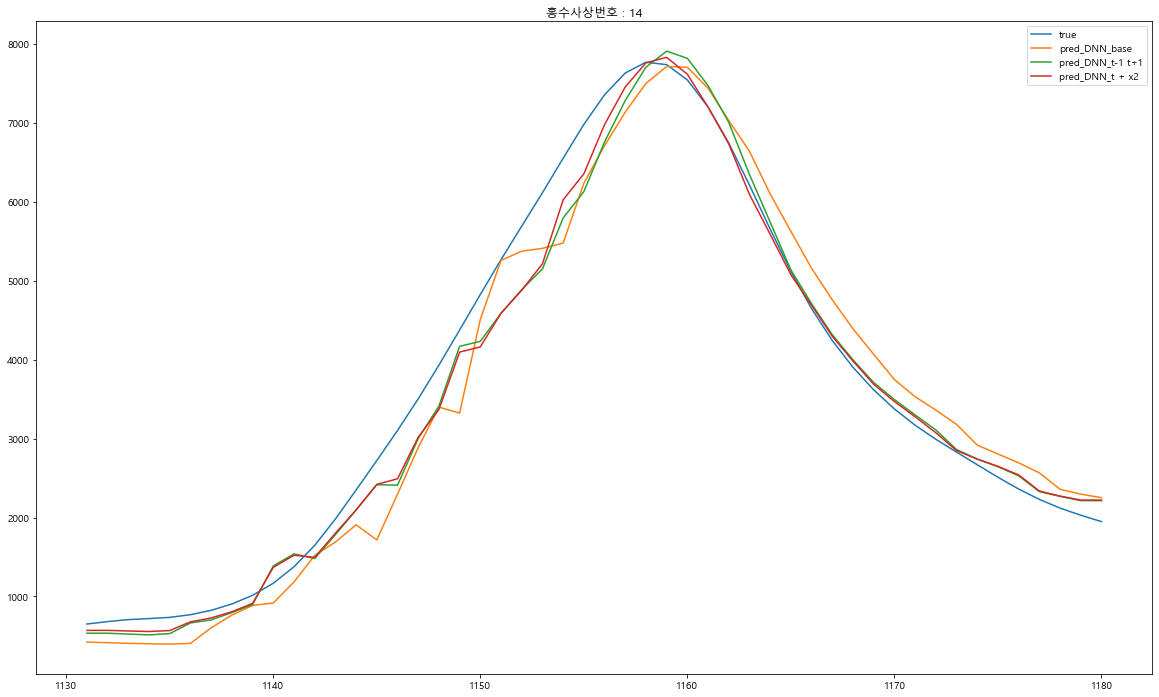

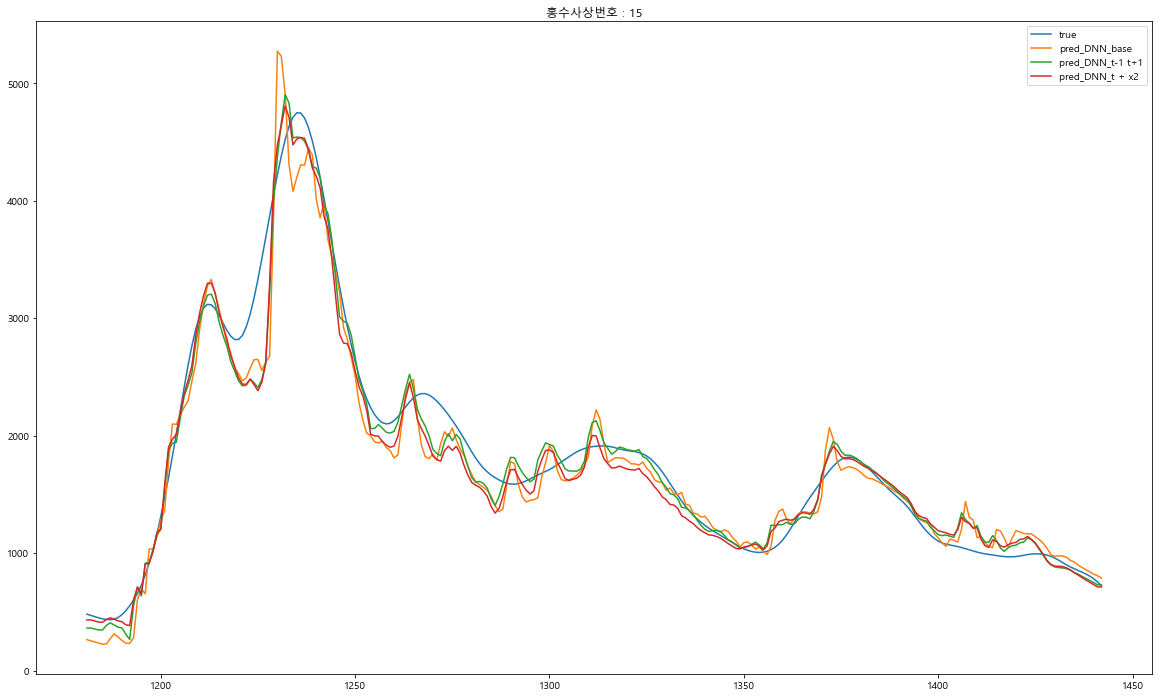

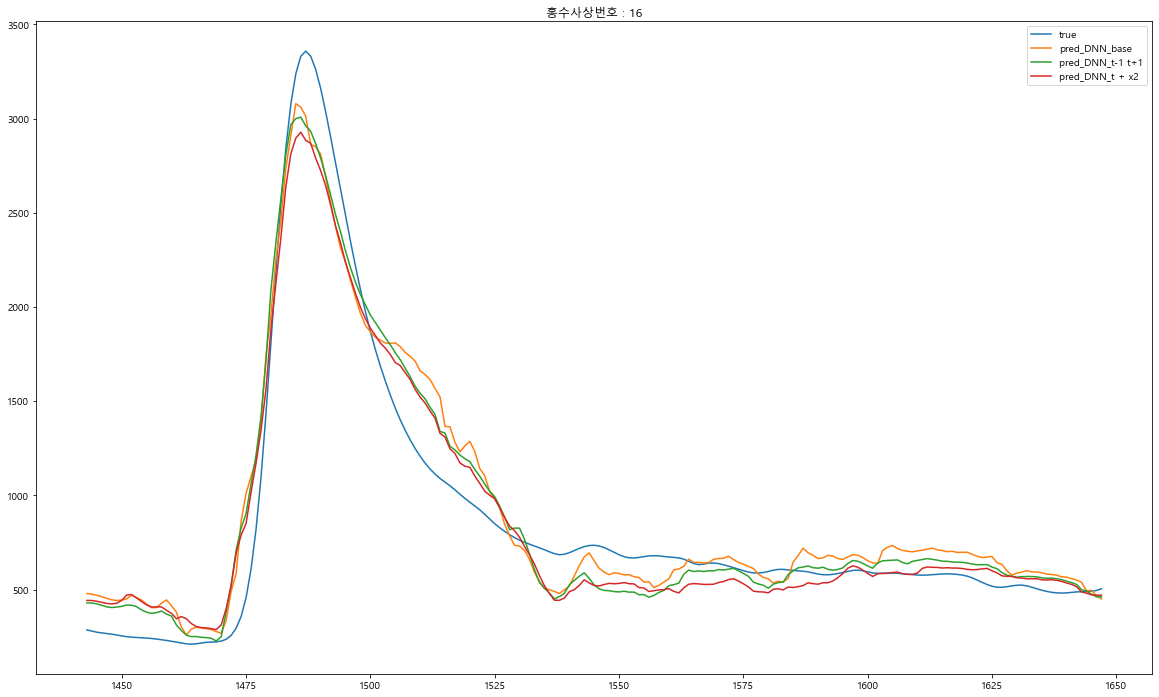

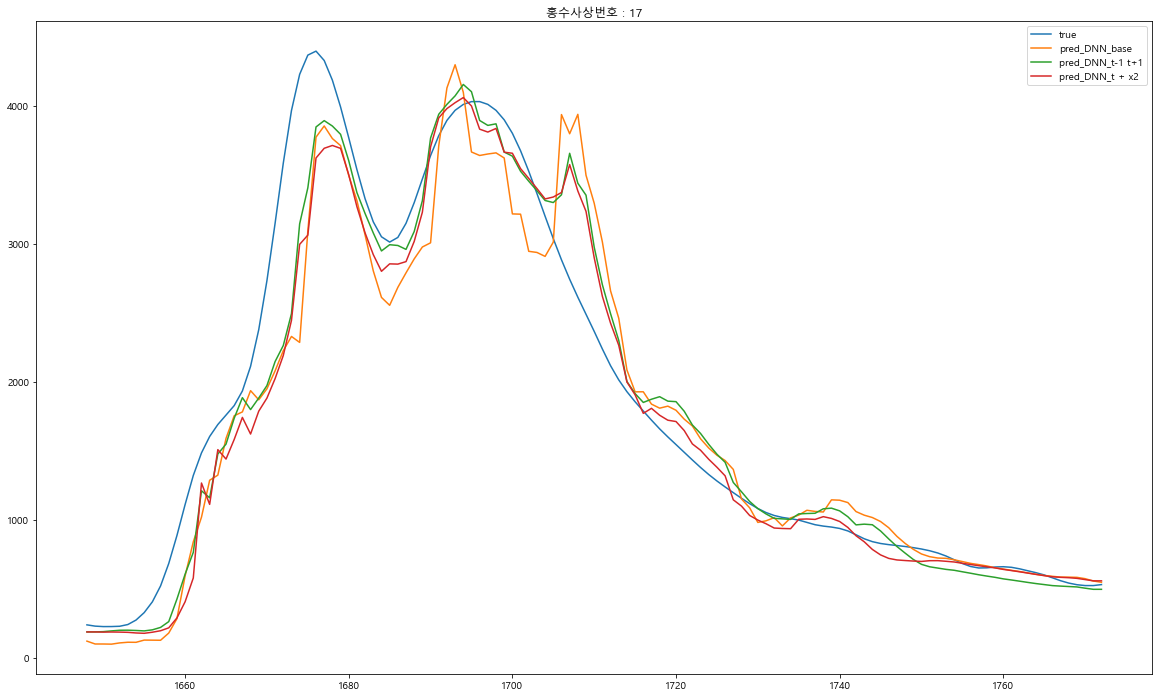

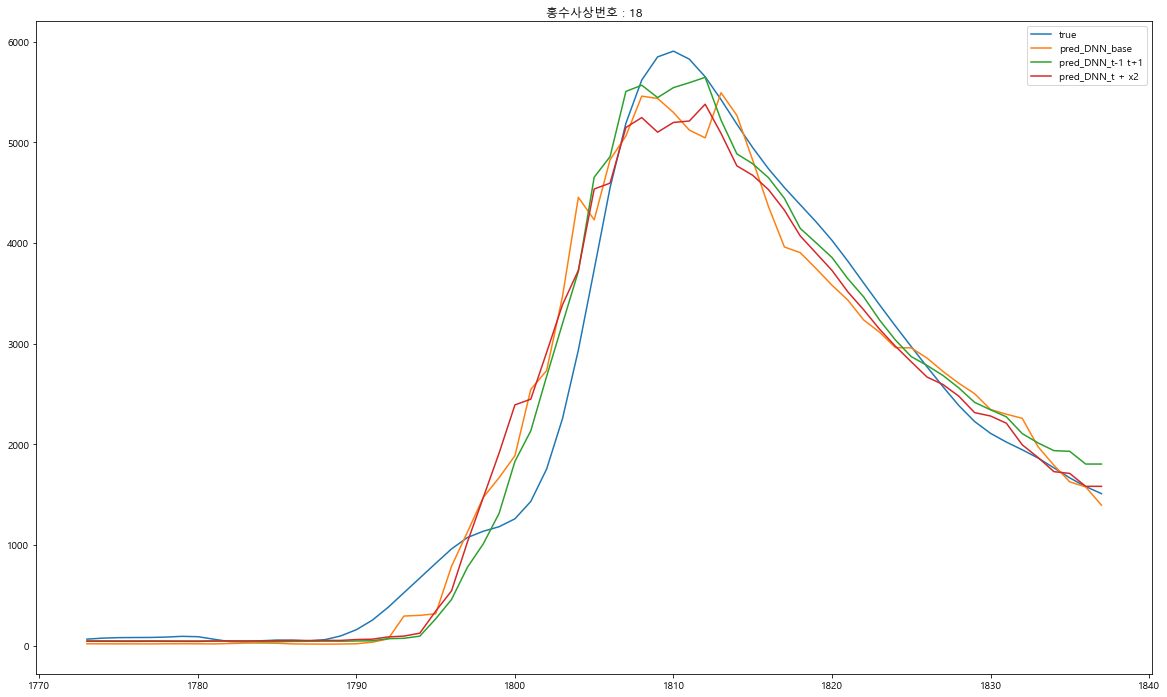

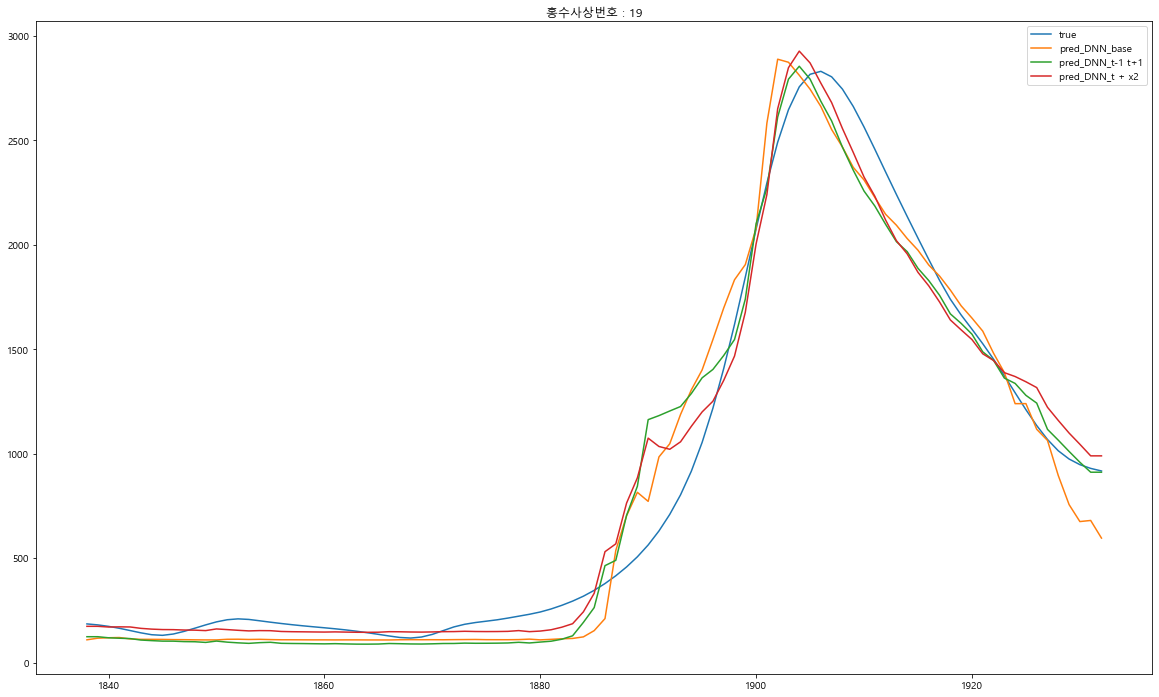

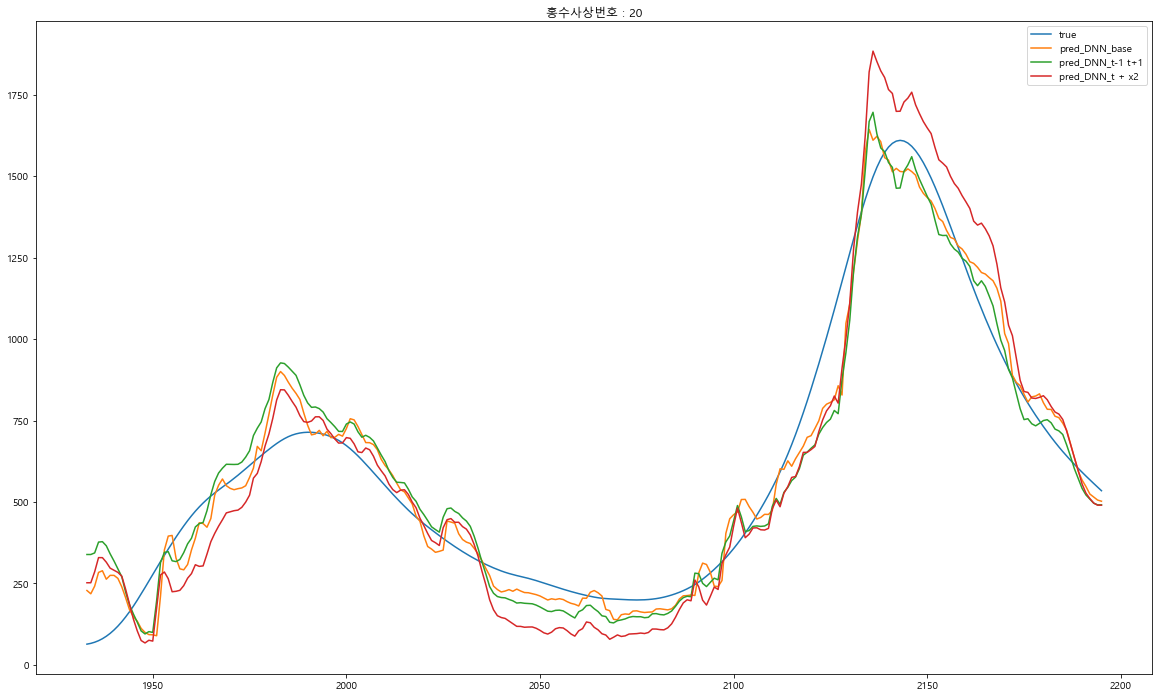

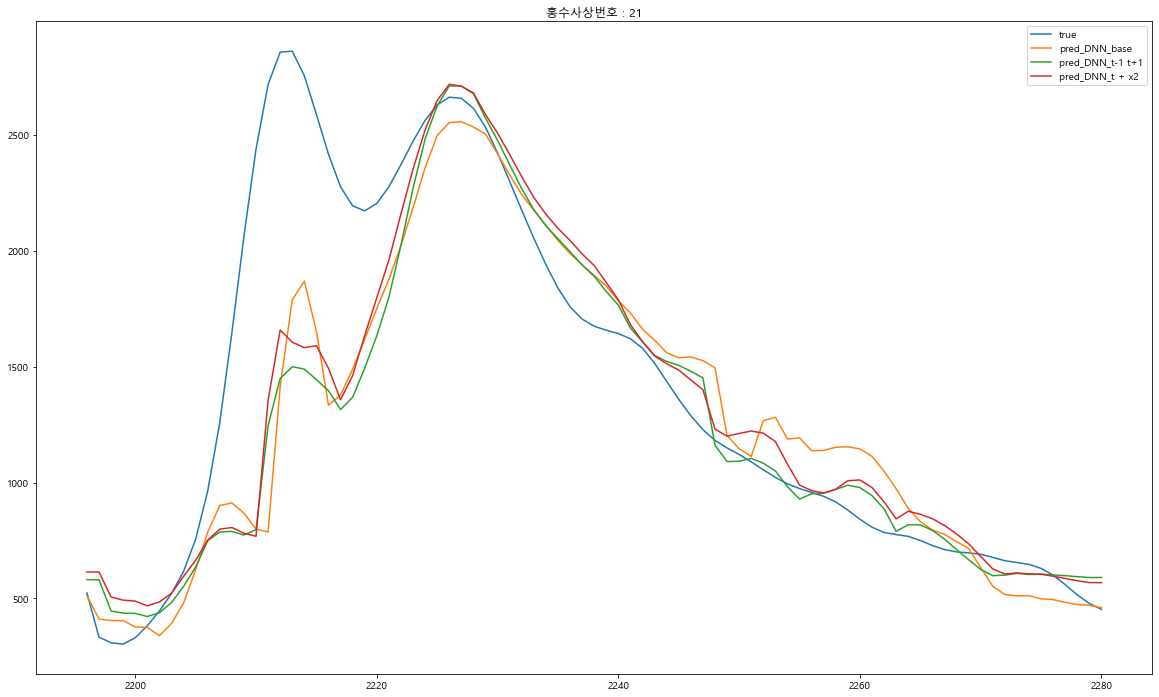

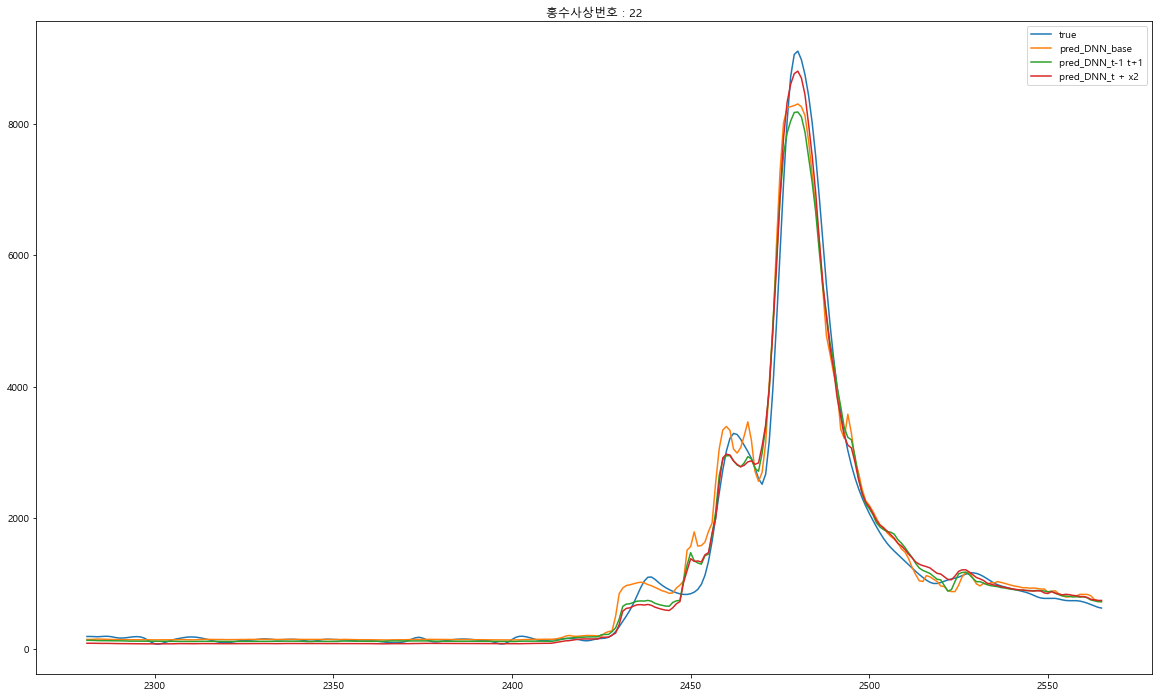

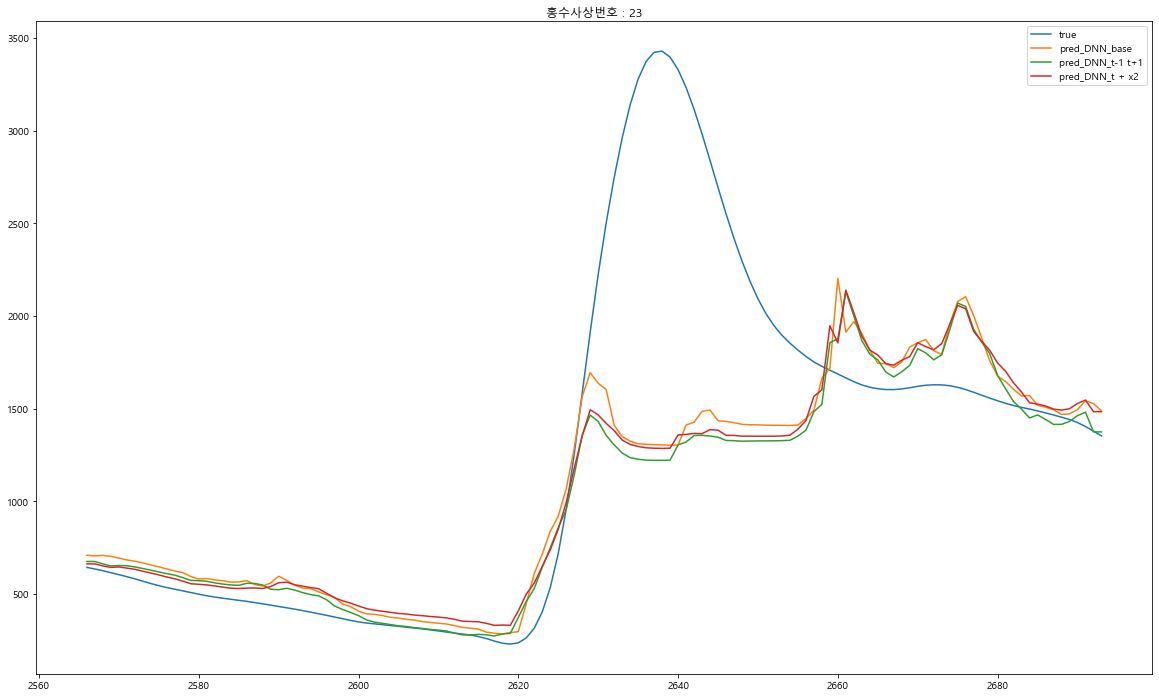

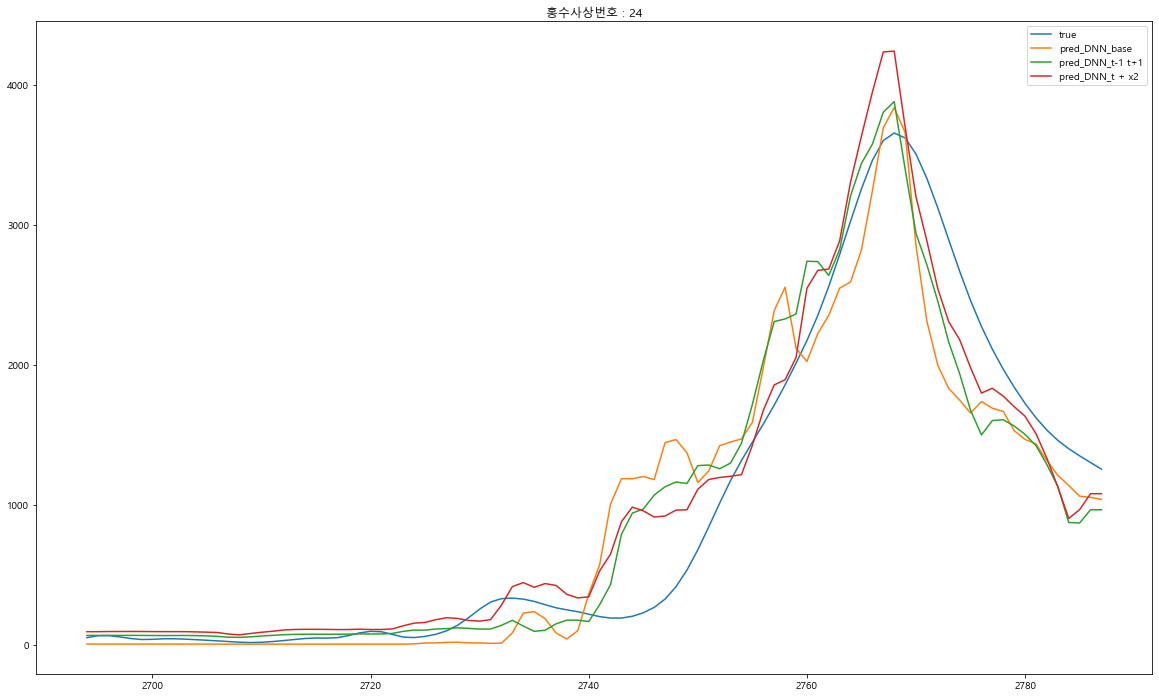

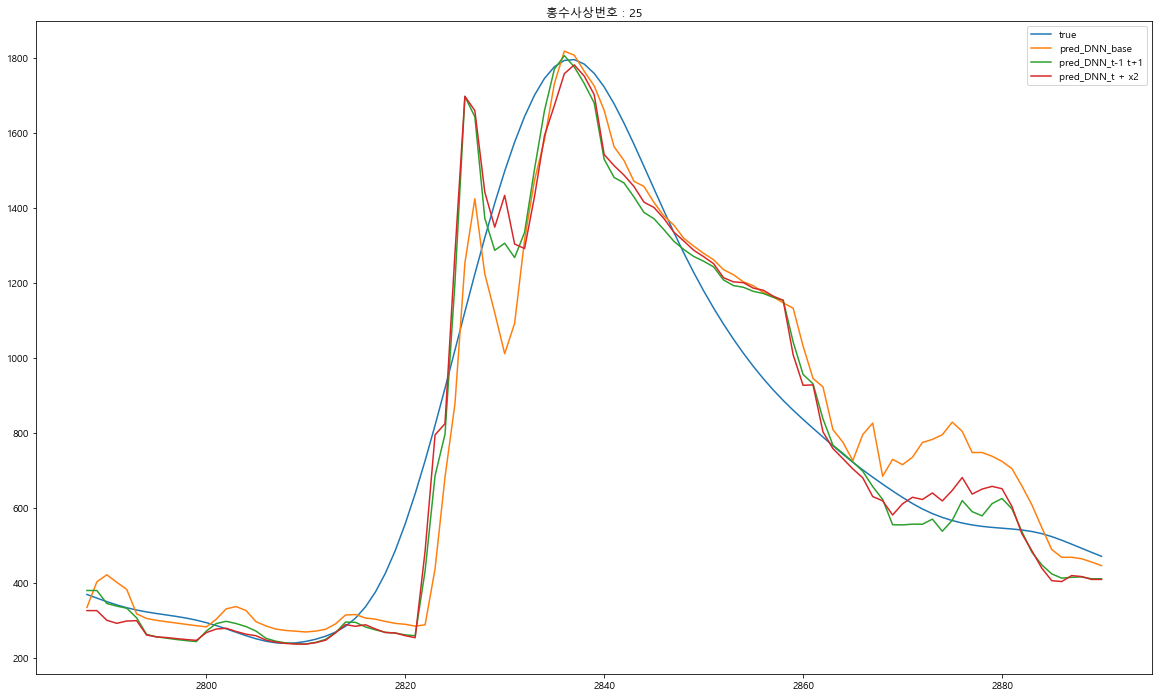

In [24]:
plot_hongsunum(predict_df, names = ['DNN_base', 'DNN_t-1 t+1', 'DNN_t + x2'])